# Loading the libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import re
import plotly.express as px
pd.options.display.float_format = "{:.2f}".format
%matplotlib inline
sns.set()

# Data Processing And Cleaning

In [2]:
df1=pd.read_csv('googleplaystore.csv')
df2=pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,nan,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30


In [5]:
df1.shape,df2.shape

((10841, 13), (64295, 5))

In [6]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df2.drop(['Translated_Review','Sentiment','Sentiment_Subjectivity'],axis=1,inplace=True)

In [8]:
aggregation_functions = {'Sentiment_Polarity': 'mean'}
df_new = df2.groupby(df2['App']).agg(aggregation_functions)

In [9]:
df_new['App'] = df_new.index
df_new=df_new.reset_index(drop=True)
df_new=df_new.loc[:,['App','Sentiment_Polarity']]

In [10]:
df=pd.merge(df1,df_new,on='App')

In [11]:
df.drop(['Last Updated','Current Ver','Android Ver','Content Rating'],axis=1,inplace=True)

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Sentiment_Polarity
0,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Art & Design;Pretend Play,0.15
1,Coloring book moana,FAMILY,3.90,974,14M,"500,000+",Free,0,Art & Design;Pretend Play,0.15
2,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33M,"1,000,000+",Free,0,Art & Design,0.27
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.30,194216,39M,"5,000,000+",Free,0,Art & Design,0.41
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.10,654,12M,"100,000+",Free,0,Art & Design,0.28


In [13]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews                object
Size                   object
Installs               object
Type                   object
Price                  object
Genres                 object
Sentiment_Polarity    float64
dtype: object

In [14]:
df['Rating']=df['Rating'].astype(float)
df['Reviews']=df['Reviews'].astype(int)

In [15]:
df=df[~(df['Size']=='Varies with device')]
df['Size'] = df['Size'].map(lambda x: re.sub(r'k', '', x))
df['Size'] = df['Size'].map(lambda x: re.sub(r'M', '', x))
df['Size']=pd.to_numeric(df['Size'])

In [16]:
df['Installs'] = df['Installs'].map(lambda x: re.sub(r'\W+', '', x))
df['Installs']=pd.to_numeric(df['Installs'])

In [64]:
df['Price']=df['Price'].map(lambda x: re.sub(r'\W+', '', x))
df['Price']=pd.to_numeric(df['Price'])

In [17]:
df.drop_duplicates(subset='App',inplace=True)

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Sentiment_Polarity
0,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0,Art & Design;Pretend Play,0.15
2,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33.00,1000000,Free,0,Art & Design,0.27
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.30,194216,39.00,5000000,Free,0,Art & Design,0.41
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.10,654,12.00,100000,Free,0,Art & Design,0.28
5,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.70,20260,25.00,500000,Free,0,Art & Design;Creativity,0.17


# Analysis

In [19]:
#App with best rating
df[df['Reviews']>500].sort_values('Rating',ascending=False).reset_index()[['App','Rating']][:10].drop_duplicates()

,App,Rating
0,DMV Permit Practice Test 2018 Edition,4.90
1,CDL Practice Test 2018 Edition,4.90
2,Down Dog: Great Yoga Anywhere,4.90
3,Home Workout - No Equipment,4.80
4,FreePrints – Free Photos Delivered,4.80
5,GoodRx Drug Prices and Coupons,4.80
6,GPS Speedometer and Odometer,4.80
7,"Even - organize your money, get paid early",4.80
8,Home Workout for Men - Bodybuilding,4.80
9,Amino: Communities and Chats,4.80


In [20]:
#App with worst rating
df[df['Reviews']>500].sort_values('Rating').reset_index()[['App','Rating']][:10].drop_duplicates()

,App,Rating
0,Anthem Anywhere,2.70
1,Allegiant,3.10
2,EyeCloud,3.10
3,Entel,3.20
4,Free Dating Hook Up Messenger,3.30
5,Baseball Boy!,3.40
6,ColorSnap® Visualizer,3.40
7,Draw A Stickman,3.40
8,BeWild Free Dating & Chat App,3.40
9,Fantasy Football,3.50


In [21]:
#App with most Review
df.sort_values('Reviews',ascending=False).reset_index()[['App','Reviews']][:10].drop_duplicates()

,App,Reviews
0,Clash of Clans,44891723
1,Clash Royale,23133508
2,Candy Crush Saga,22426677
3,8 Ball Pool,14198297
4,Cache Cleaner-DU Speed Booster (booster & clea...,12759663
5,Hay Day,10053186
6,Dream League Soccer 2018,9882639
7,Hill Climb Racing,8923587
8,Asphalt 8: Airborne,8389714
9,Farm Heroes Saga,7614130


In [22]:
#App with most Installs
df.sort_values('Installs',ascending=False).reset_index()[['App','Installs']][:10].drop_duplicates()

,App,Installs
0,Google News,1000000000
1,Dropbox,500000000
2,Candy Crush Saga,500000000
3,Extreme Car Driving Simulator,100000000
4,Farm Heroes Saga,100000000
5,Cut the Rope FULL FREE,100000000
6,Cooking Fever,100000000
7,Garena Free Fire,100000000
8,Dream League Soccer 2018,100000000
9,"APUS Launcher - Theme, Wallpaper, Hide Apps",100000000


In [23]:
#App with best Sentiment Score
df[df['Reviews']>500].sort_values('Sentiment_Polarity',ascending=False).reset_index()[['App','Sentiment_Polarity']][:10].drop_duplicates()

,App,Sentiment_Polarity
0,HomeWork,1.00
1,Bed Time Fan - White Noise Sleep Sounds,0.78
2,Cameringo Lite. Filters Camera,0.77
3,Google Primer,0.75
4,GPS Map Free,0.70
5,GPS Speedometer and Odometer,0.69
6,Best Ovulation Tracker Fertility Calendar App ...,0.60
7,3D Live Neon Weed Launcher,0.57
8,"CM Flashlight (Compass, SOS)",0.56
9,Hipmunk Hotels & Flights,0.55


In [24]:
#App with good rating and downloads
df.loc[(df['Rating']>4)&(df['Installs']>100000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Sentiment_Polarity
457,Candy Crush Saga,GAME,4.40,22426677,74.00,500000000,Free,0,Casual,0.03
1092,Dropbox,PRODUCTIVITY,4.40,1861310,61.00,500000000,Free,0,Productivity,0.24


In [25]:
#App with poor rating and have high downloads
df.loc[(df['Rating']<3)&(df['Installs']>100000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Sentiment_Polarity
717,Anthem Anywhere,MEDICAL,2.70,2657,24.00,500000,Free,0,Medical,-0.09


In [26]:
#Distribution of Category in Android Market
cat=[]
for i in range(len(df['Category'].value_counts().index)):
    cat.append(df['Category'].value_counts().index[i])

size=[]
for i in range(len(df['Category'].value_counts())):
    size.append(df['Category'].value_counts()[i])
    
trace = go.Pie(labels = cat, values = size)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

In [31]:
#Average Rating of each category
aggregation_functions = {'Rating': 'mean'}
x=df.groupby(df['Category']).agg(aggregation_functions)
data = [go.Bar(
   x = x.index,
   y = x['Rating']
)]
fig = go.Figure(data=data)
iplot(fig)

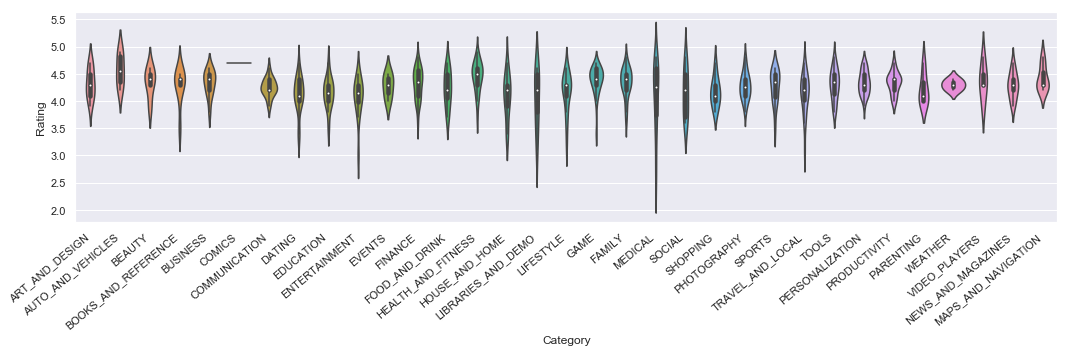

In [37]:
#Distribution of rating of each category
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="Category", y="Rating", data=df);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

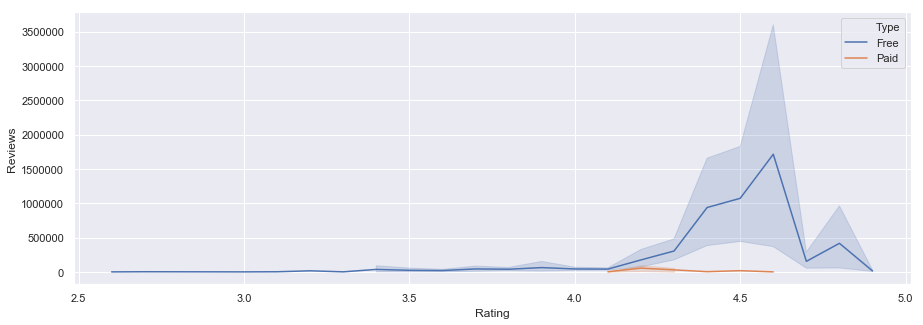

In [44]:
#Chnange of rating with respect to number of reviews
plt.figure(figsize=(15,5))
sns.lineplot(x="Rating", y="Reviews", data=df,hue='Type');

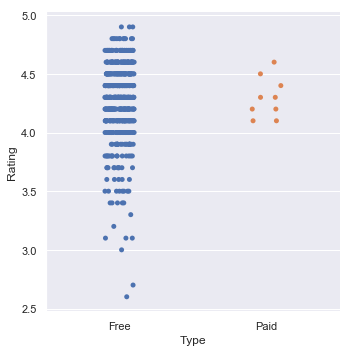

In [45]:
#Distribution of rating of paid and free app
sns.catplot(x="Type", y="Rating", data=df);

In [58]:
#How size affect the rating of app
plt.figure(figsize=(15,5))
fig = px.scatter(df, x="Rating", y="Size")
fig.show()

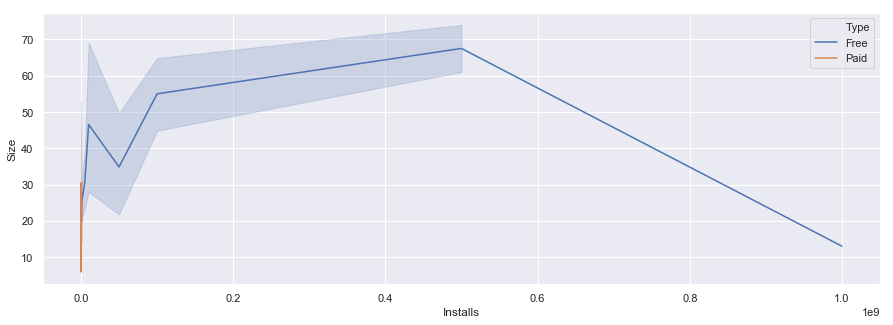

In [49]:
#How size affect the number of installation
plt.figure(figsize=(15,5))
sns.lineplot(x="Installs", y="Size", data=df,hue='Type');

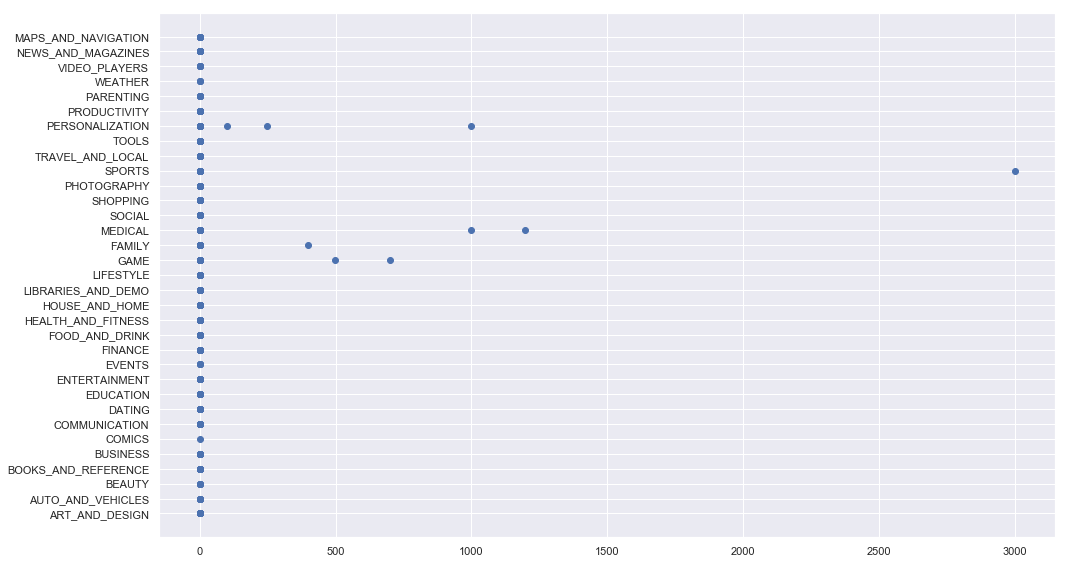

In [71]:
#Paid or Free app category wise
plt.figure(figsize=(15,8))
ax = plt.scatter(x="Price", y="Category", data=df);

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

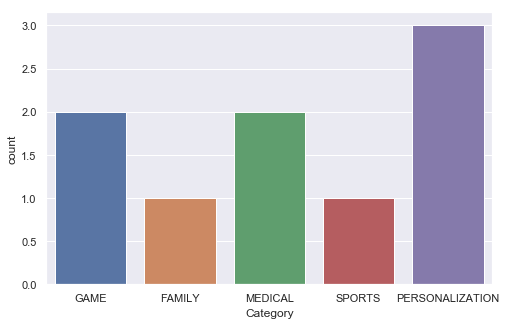

In [75]:
#Paid App Category
paid_apps=df[df['Type']=='Paid']['Category']
plt.figure(figsize=(8,5))
sns.countplot(paid_apps)

,Installs
Type,
Free,7220240000
Paid,2361000


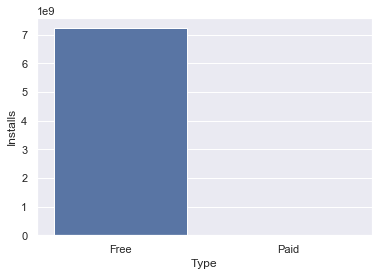

In [85]:
#Number of installs of paid and free app
aggregation_functions = {'Installs': 'sum'}
x1=df.groupby(df['Type']).agg(aggregation_functions)
sns.barplot(x=x1.index,y=x1['Installs'])
x1

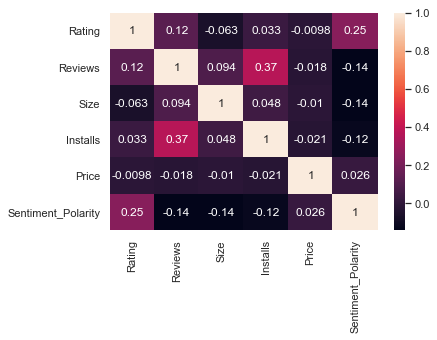

In [87]:
#Correlation Matrix
sns.heatmap(df.corr(),annot=True)

In [91]:
#Distribution of Genre in Android Market
gen=[]
for i in range(len(df['Genres'].value_counts().index)):
    gen.append(df['Genres'].value_counts().index[i])

size=[]
for i in range(len(df['Genres'].value_counts())):
    size.append(df['Genres'].value_counts()[i])
    
trace = go.Pie(labels = gen, values = size)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)